In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd
import sys
import squarify as sq
import unicodedata

In [2]:
data=pd.read_csv(r"C:\Users\Hello\Downloads\autos (2).csv",encoding_errors='replace')

In [3]:
data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.drop(["nrOfPictures"],axis=1,inplace=True)


In [9]:
#1) Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization

In [10]:
x=data.groupby("brand")
y=x[["vehicleType"]].count()
z=pd.DataFrame(y.index)
z["count"]=y.values
z

,brand,count
0,alfa_romeo,2095
1,audi,30426
2,bmw,37412
3,chevrolet,1700
4,chrysler,1319
5,citroen,4651
6,dacia,849
7,daewoo,464
8,daihatsu,705
9,fiat,8436


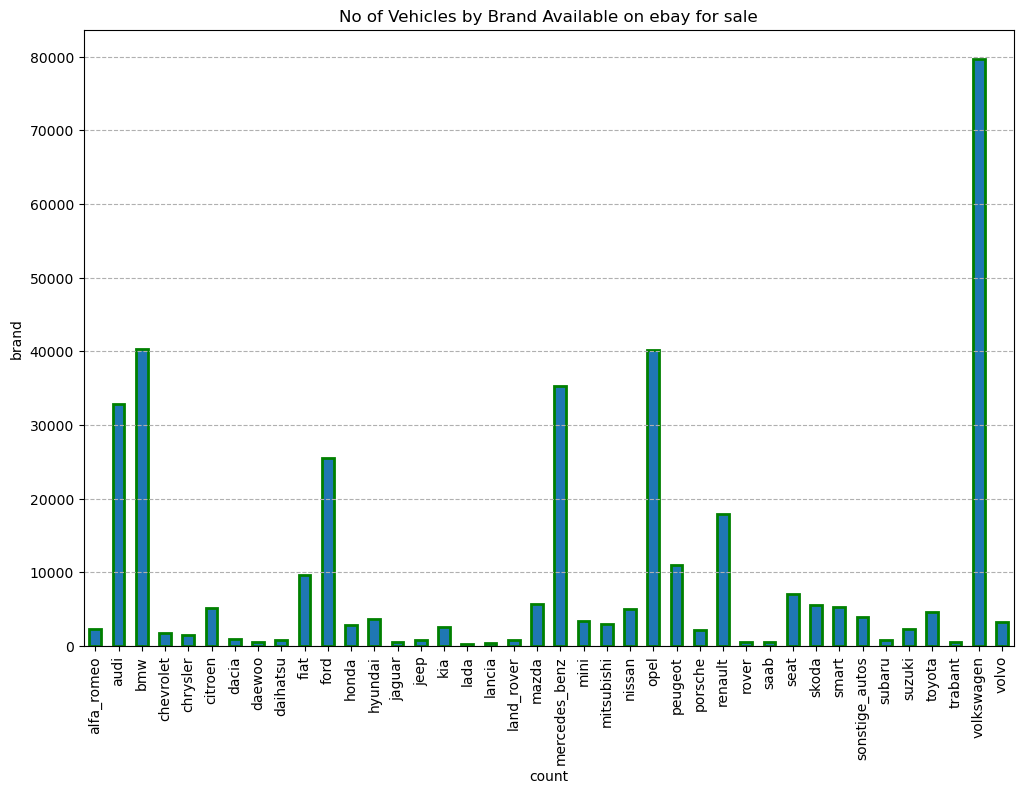

In [16]:
plt.figure(figsize=(12, 8))
M= data.groupby(['brand'])['brand'].count()
M.plot(kind="bar", edgecolor="g",linewidth=2)
plt.xlabel("count")
plt.ylabel("brand")
plt.title("No of Vehicles by Brand Available on ebay for sale")
plt.grid(axis="y",linestyle="--")
plt.show()

In [17]:
# 2) What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both nu

In [21]:
x=pd.pivot_table(data,index="vehicleType", columns="gearbox", values="price", aggfunc="mean")
x

gearbox,automatik,manuell
vehicleType,,
andere,7366.861496,825539.352000
bus,10599.265713,6321.168265
cabrio,16254.374208,14897.823880
coupe,35510.948175,12400.255031
kleinwagen,3889.552200,4606.803784
kombi,8910.045892,7464.741491
limousine,19004.102243,8505.151711
suv,16764.091774,10040.553599


<Figure size 1200x800 with 0 Axes>

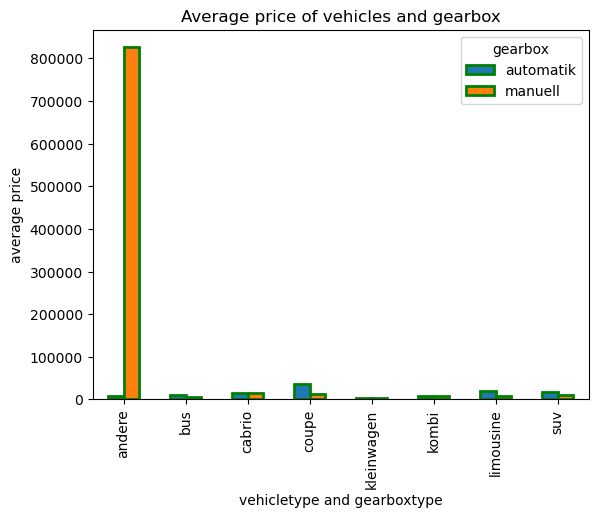

In [22]:
x=pd.pivot_table(data,index="vehicleType", columns="gearbox", values="price", aggfunc="mean")
plt.figure(figsize=(12, 8))
x.plot(kind="bar", edgecolor="g",linewidth=2)
plt.xlabel("vehicletype and gearboxtype")
plt.ylabel("average price")
plt.title("Average price of vehicles and gearbox")
plt.show()

In [23]:
# 3) What is the marginal probability of private seller

In [28]:
pd.crosstab(index=data["seller"], columns=data["seller"], normalize="all", margins=True)

seller,gewerblich,privat,All
seller,,,
gewerblich,0.000008,0.000000,0.000008
privat,0.000000,0.999992,0.999992
All,0.000008,0.999992,1.000000
